<a href="https://colab.research.google.com/github/DivyashreeR008/DNYX-PROJECT/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Automatically detect the uploaded file name
filename = list(uploaded.keys())[0]

# Try reading as CSV. If it fails, try Excel.
try:
    df = pd.read_csv(filename)
    print("Loaded as CSV")
except Exception:
    df = pd.read_excel(filename)
    print("Loaded as Excel")

df.head()


Saving Maths.csv to Maths.csv
Loaded as Excel


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# Quick overview
print("Columns and dtypes:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(30))
print("\nSummary statistics (numeric):")
display(df.describe().T)
print("\nSummary (non-numeric):")
display(df.describe(include=['object','category']).T)


Columns and dtypes:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoo

,count,mean,std,min,25%,50%,75%,max
age,397.0,16.705290,1.279716,15.0,16.0,17.0,18.0,22.0
Medu,397.0,2.748111,1.097301,0.0,2.0,3.0,4.0,4.0
Fedu,397.0,2.521411,1.090672,0.0,2.0,2.0,3.0,4.0
traveltime,397.0,1.450882,0.696840,1.0,1.0,1.0,2.0,4.0
studytime,397.0,2.032746,0.838731,1.0,1.0,2.0,2.0,4.0
failures,397.0,0.335013,0.742714,0.0,0.0,0.0,0.0,3.0
famrel,397.0,3.944584,0.894400,1.0,4.0,4.0,5.0,5.0
freetime,397.0,3.234257,0.996476,1.0,3.0,3.0,4.0,5.0
goout,397.0,3.108312,1.112762,1.0,2.0,3.0,4.0,5.0
Dalc,397.0,1.478589,0.889143,1.0,1.0,1.0,2.0,5.0



Summary (non-numeric):


,count,unique,top,freq
school,397,2,GP,350
sex,397,2,F,209
address,397,2,U,308
famsize,397,2,GT3,283
Pstatus,397,2,T,355
Mjob,397,5,other,142
Fjob,397,5,other,217
reason,397,4,course,146
guardian,397,3,mother,275
schoolsup,397,2,no,345


In [5]:
# Heuristics to guess target - but change TARGET_COL to desired label manually if different
# We'll print candidates that look like score or pass/fail
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
candidates = []
for col in df.columns:
    lc = col.lower()
    if any(x in lc for x in ['score','marks','grade','percent','percentage','math','result','passed','pass']):
        candidates.append(col)
print("Suggested target columns (heuristic):", candidates)
# Set target manually if auto-selection is wrong:
TARGET_COL = None
# If exactly one candidate found, use it:
if len(candidates) == 1:
    TARGET_COL = candidates[0]
print("Current TARGET_COL =", TARGET_COL)


Suggested target columns (heuristic): []
Current TARGET_COL = None


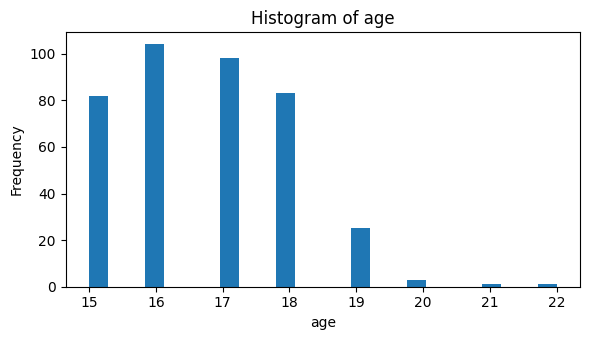

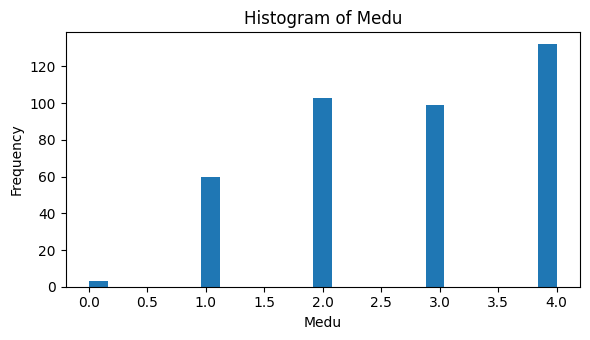

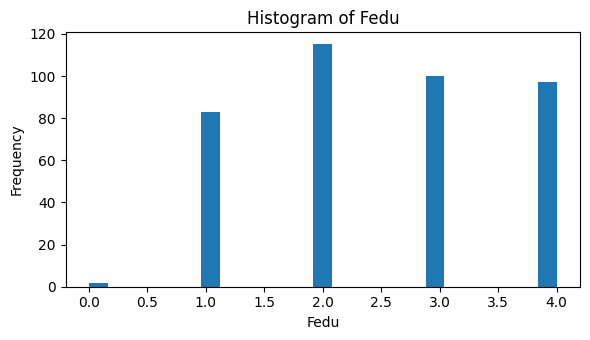

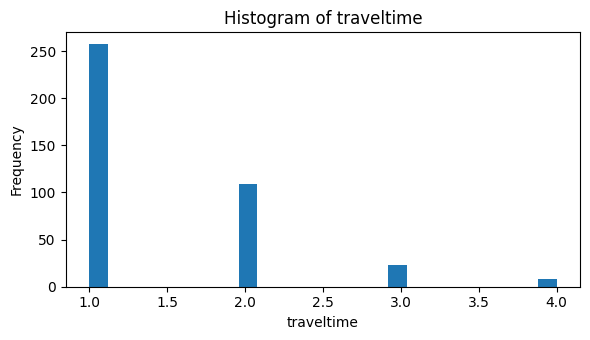

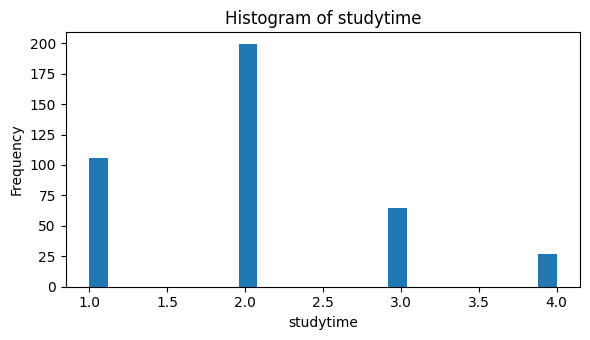

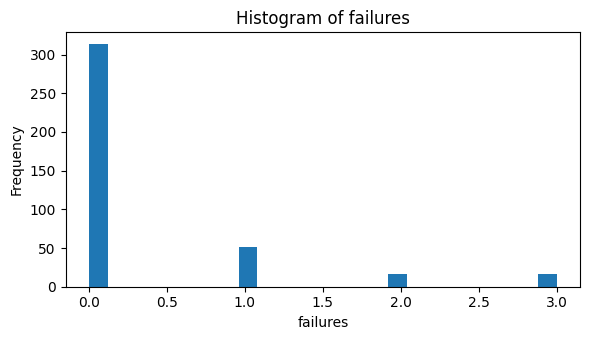

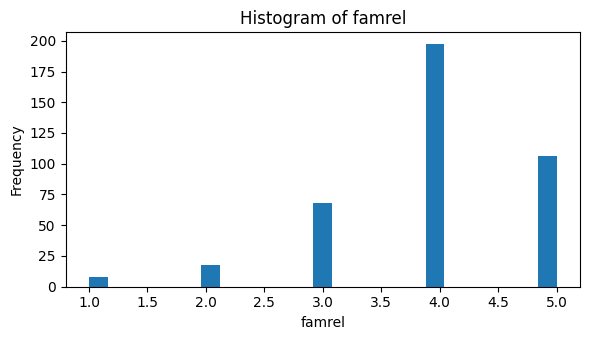

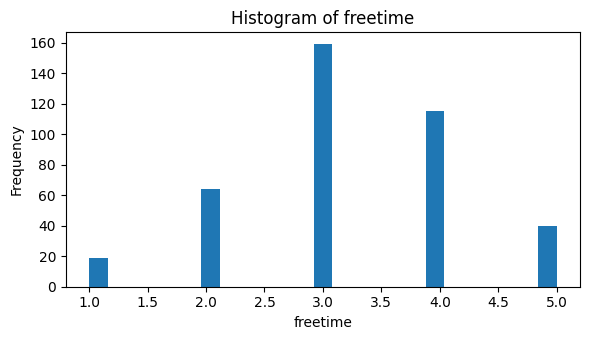

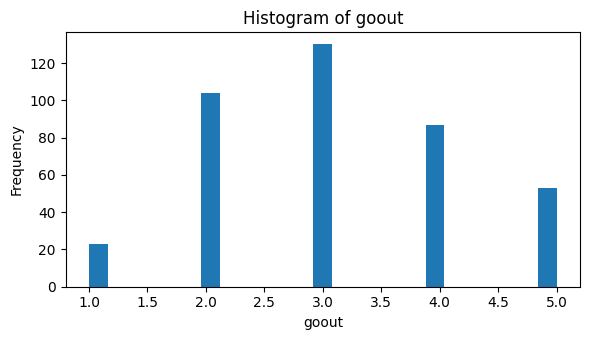

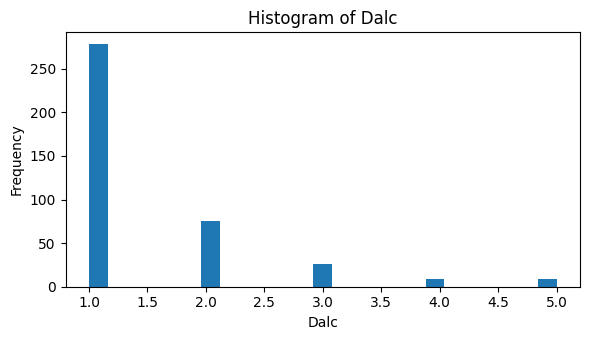

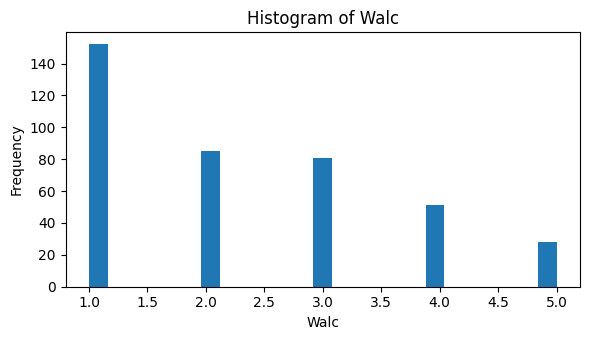

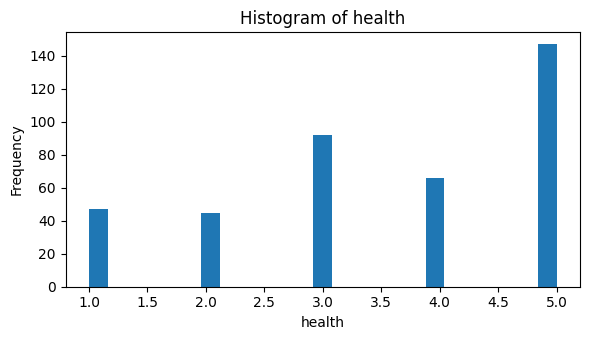

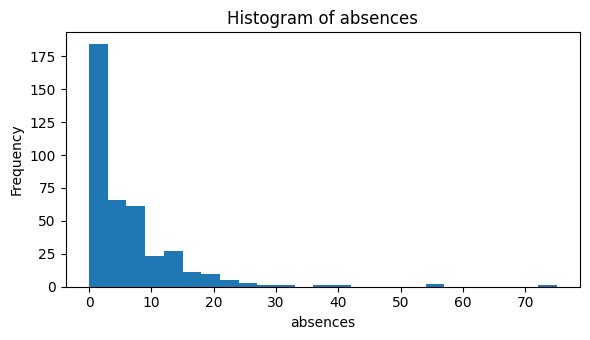

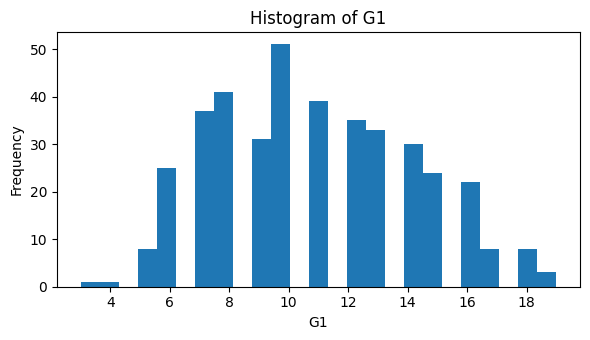

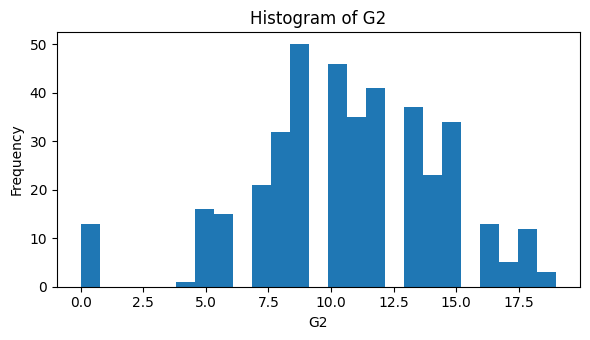

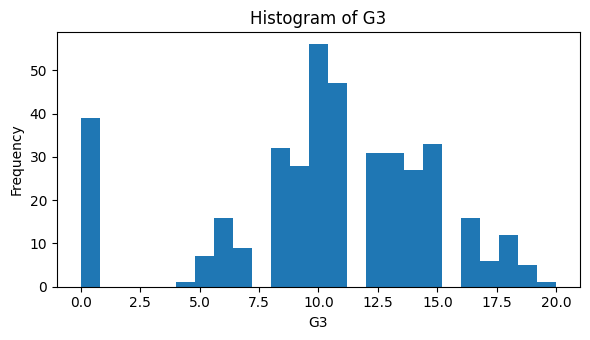

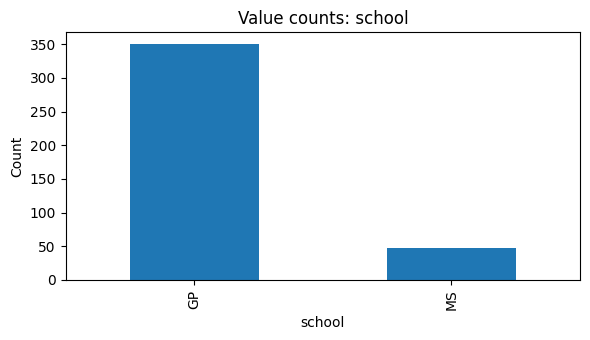

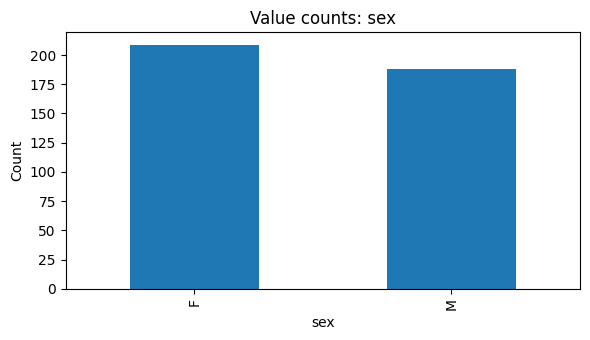

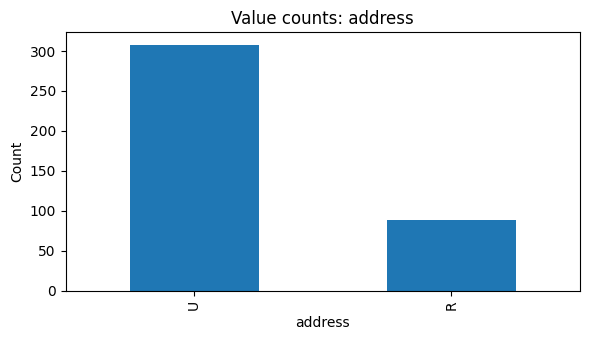

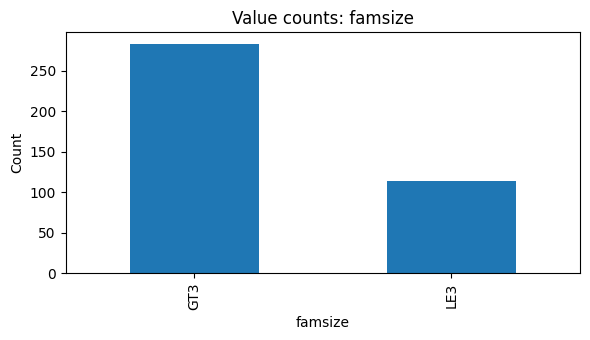

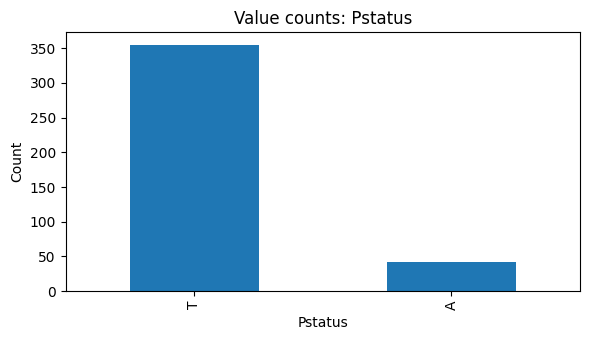

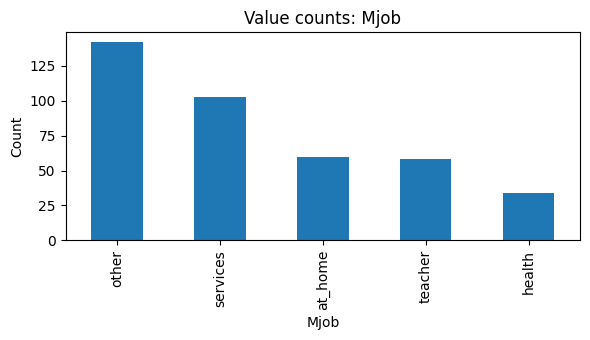

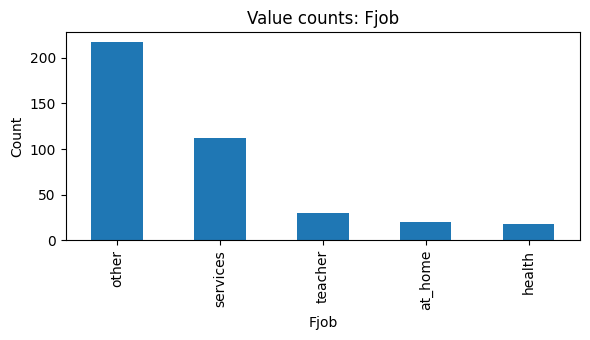

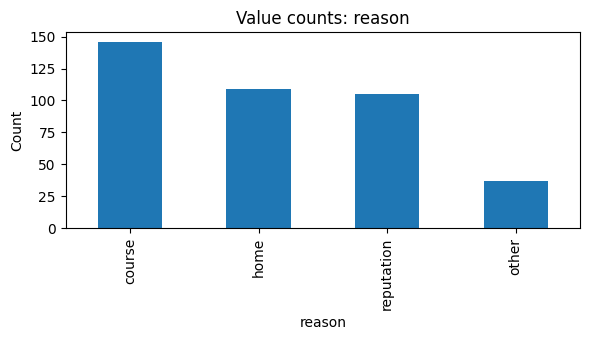

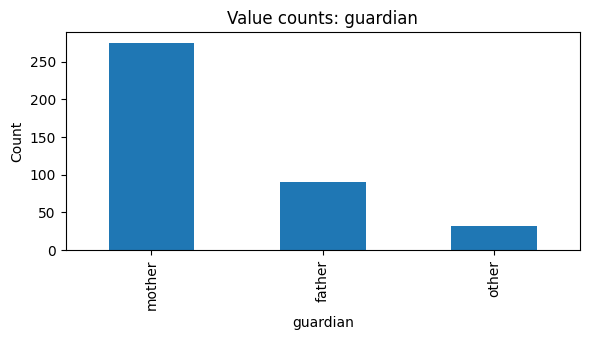

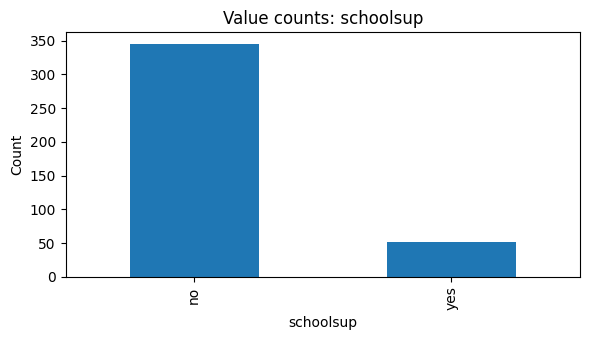

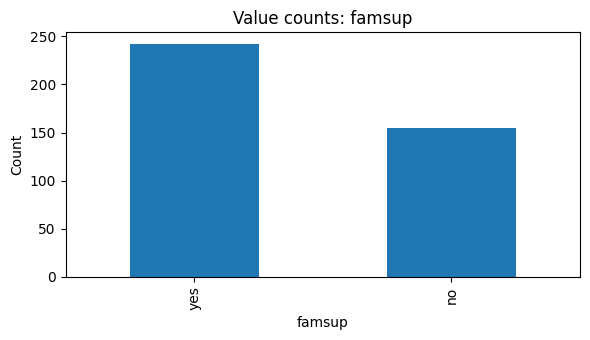

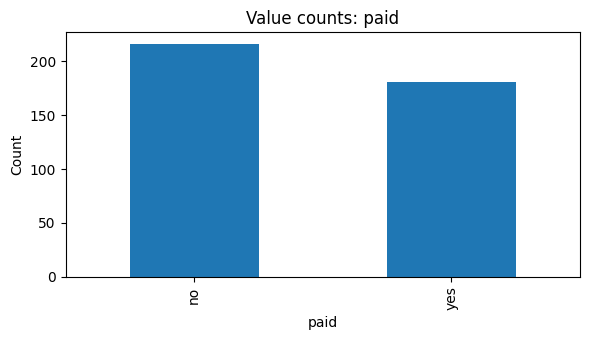

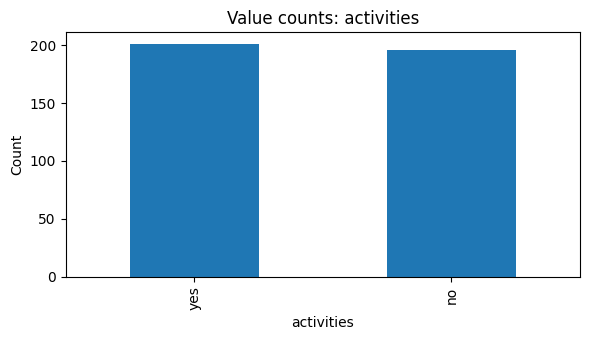

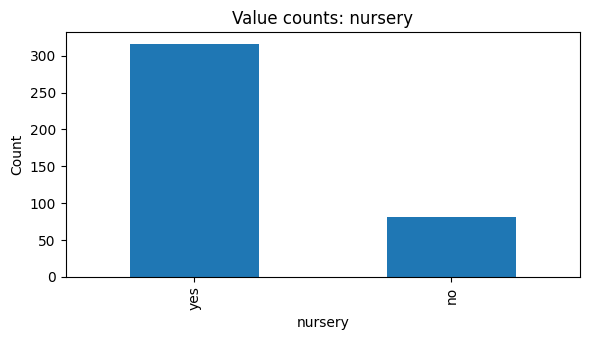

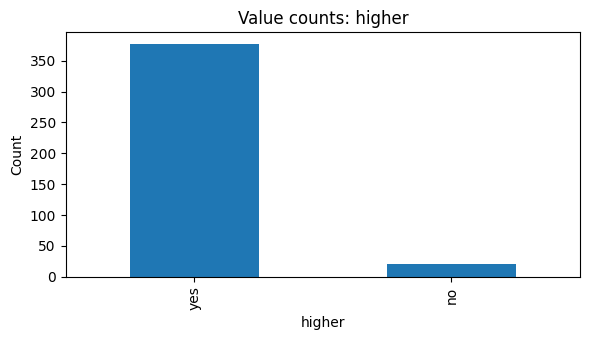

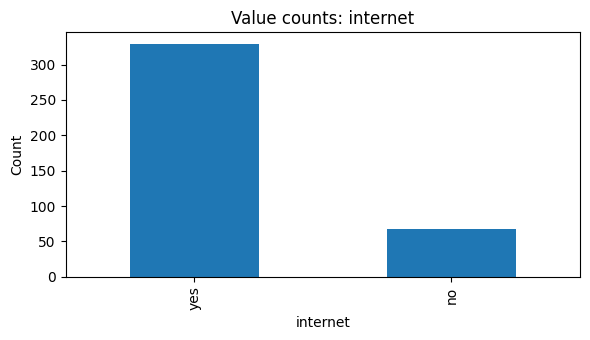

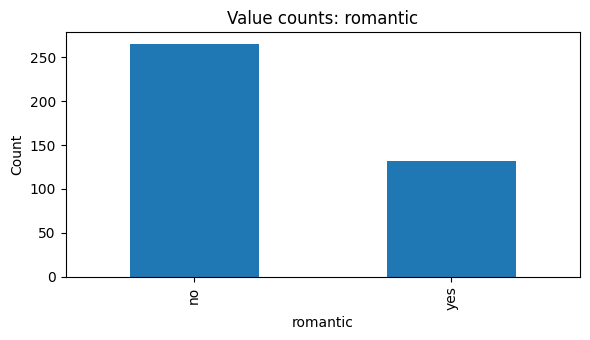

In [6]:
# Basic EDA visuals. One plot per cell to keep Colab outputs clean.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Bar charts for small-cardinality categorical columns
for col in cat_cols:
    counts = df[col].value_counts()
    if counts.shape[0] <= 30: # only plot if not too many categories
        plt.figure(figsize=(6,3.5))
        counts.plot.bar()
        plt.title(f"Value counts: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column {col} has many categories ({counts.shape[0]}); skip plotting.")


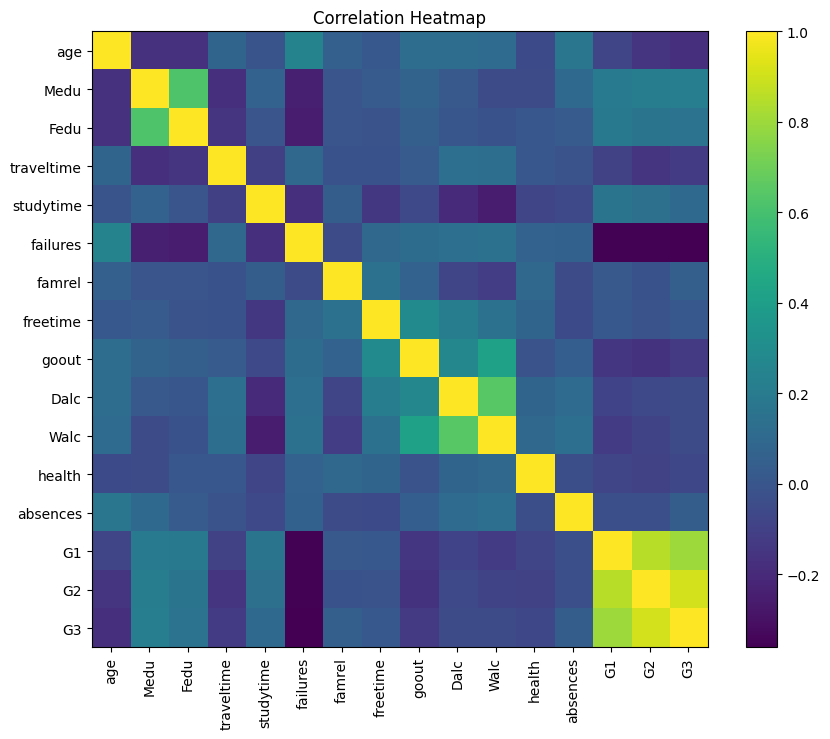

In [8]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

if len(numeric_cols) < 2:
    print("Not enough numeric columns for correlation heatmap.")
else:
    corr = df[numeric_cols].corr()

    plt.figure(figsize=(10,8))
    plt.imshow(corr, cmap='viridis')
    plt.colorbar()
    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
    plt.yticks(range(len(numeric_cols)), numeric_cols)
    plt.title("Correlation Heatmap")
    plt.show()



In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features)
    ])


In [15]:
# --- Create Performance Level target column ---
# High (>=15), Medium (>=10), Low (<10)
df['Performance Level'] = df['G3'].apply(
    lambda x: 'High' if x >= 15 else ('Medium' if x >= 10 else 'Low')
)

# Set your target column
TARGET_COL = "Performance Level"

# Split features and target
X = df.drop(TARGET_COL, axis=1)
y = df[TARGET_COL]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Target samples:")
print(y.value_counts())


Train size: (317, 33)
Test size: (80, 33)
Target samples:
Performance Level
Medium    192
Low       132
High       73
Name: count, dtype: int64


In [16]:
# Example GridSearch for RandomForest (classification). Keep grid small for speed in Colab.
from sklearn.model_selection import GridSearchCV

# Only run if you already saw baseline performance and want to tune.
do_tune = False  # set True to run tuning (may take time)
if do_tune and TARGET_COL is not None:
    y = df[TARGET_COL]
    X = df.drop(columns=[TARGET_COL])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', RandomForestClassifier(random_state=42))])
    param_grid = {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20],
    }
    gs = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, scoring='accuracy' if y.dtype.kind not in 'f' else 'r2')
    gs.fit(X_train, y_train)
    print("Best params:", gs.best_params_)
    best = gs.best_estimator_
    preds = best.predict(X_test)
    if y.dtype.kind in 'f':
        print("R2:", r2_score(y_test, preds))
    else:
        print("Accuracy:", accuracy_score(y_test, preds))


In [18]:
# Save the final model (if trained) and demonstrate inference on hypothetical new rows
import joblib

model_filename = 'final_model.pkl'

try:
    if 'clf' in globals():
        joblib.dump(clf, model_filename)
        print("Saved classifier to", model_filename)
        active_model = clf
    elif 'reg' in globals():
        joblib.dump(reg, model_filename)
        print("Saved regressor to", model_filename)
        active_model = reg
    else:
        print("No trained model found.")
        active_model = None
except Exception as e:
    print("Error while saving model:", e)
    active_model = None


# Example: inference on top 5 test rows (if X_test exists and a model is loaded)
try:
    if active_model is not None and 'X_test' in globals():
        sample_X = X_test.head(5)
        preds = active_model.predict(sample_X)
        print("Sample predictions:", preds)
        display(sample_X)
    else:
        print("Skipping inference demo — no model or no test data.")
except Exception as e:
    print("Inference error:", e)


No trained model found.
Skipping inference demo — no model or no test data.
